Let's solve a rubik's cube.

In [1]:
#%pip install torch matplotlib numpy

In [2]:
import numpy as np
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib.colors as colors

class Cube:
    def __init__(self):
        self.cube = np.zeros((5,5,5))
        self.cube[0,1:4,1:4] += np.arange(1,10).reshape((3,3))+9*1
        self.cube[-1,1:4,1:4] += np.arange(1,10).reshape((3,3))+9*0
        self.cube[1:4,1:4,0] += np.arange(1,10).reshape((3,3))+9*2
        self.cube[1:4,1:4,-1] += np.arange(1,10).reshape((3,3))+9*3
        self.cube[1:4,0,1:4] += np.arange(1,10).reshape((3,3))+9*4
        self.cube[1:4,-1,1:4] += np.arange(1,10).reshape((3,3))+9*5


    @property
    def as_input(self):
        # return cube as input vector
        flat = self.cube.reshape((5*5*5))
        return torch.tensor(flat[flat != 0],dtype=int)

    @property
    def n(self):
        # null
        return self

    @property
    def f(self):
        # front clockwise
        self.cube[-2] = np.flip(self.cube[-2].T,1)
        self.cube[-1] = np.flip(self.cube[-1].T,1)
        return self

    @property
    def F(self):
        # front counter-clockwise
        self.cube[-2] = np.flip(self.cube[-2].T,0)
        self.cube[-1] = np.flip(self.cube[-1].T,0)
        return self

    @property
    def s(self):
        # mid x-y clockwise
        self.cube[2] = np.flip(self.cube[2].T,0)
        return self

    @property
    def S(self):
        # mid x-y counter-clockwise
        self.cube[2] = np.flip(self.cube[2].T,1)
        return self

    @property
    def b(self):
        # back clockwise
        self.cube[1] = np.flip(self.cube[1].T,0)
        self.cube[0] = np.flip(self.cube[0].T,0)
        return self

    @property
    def B(self):
        # back counter-clockwise
        self.cube[1] = np.flip(self.cube[1].T,1)
        self.cube[0] = np.flip(self.cube[0].T,1)
        return self

    @property
    def l(self):
        # left clockwise
        self.cube[:,:,:2] = np.rot90(self.cube[:,:,:2],axes=(0,1))
        return self

    @property
    def L(self):
        # left counter-clockwise
        self.cube[:,:,:2] = np.rot90(self.cube[:,:,:2],axes=(1,0))
        return self

    @property
    def m(self):
        # mix y-z clockwise
        self.cube[:,:,2] = np.rot90(self.cube[:,:,2],axes=(0,1))
        return self

    @property
    def M(self):
        # mix y-z counter-clockwise
        self.cube[:,:,2] = np.rot90(self.cube[:,:,2],axes=(1,0))
        return self

    @property
    def r(self):
        # right clockwise
        self.cube[:,:,3:] = np.rot90(self.cube[:,:,3:],axes=(0,1))
        return self

    @property
    def R(self):
        # right counter-clockwise
        self.cube[:,:,3:] = np.rot90(self.cube[:,:,3:],axes=(1,0))
        return self

    @property
    def u(self):
        # up clockwise
        self.cube[:,1] = np.flip(self.cube[:,1].T,-1)
        self.cube[:,0] = np.flip(self.cube[:,0].T,-1)
        return self

    @property
    def U(self):
        # up counter-clockwise
        self.cube[:,1] = np.flip(self.cube[:,1].T,0)
        self.cube[:,0] = np.flip(self.cube[:,0].T,0)
        return self

    @property
    def e(self):
        # mid x-z clockwise
        self.cube[:,2] = np.flip(self.cube[:,2].T,-1)
        return self

    @property
    def E(self):
        # mid x-z counter-clockwise
        self.cube[:,2] = np.flip(self.cube[:,2].T,0)
        return self

    @property
    def d(self):
        # down clockwise
        self.cube[:,-2] = np.flip(self.cube[:,-2].T,0)
        self.cube[:,-1] = np.flip(self.cube[:,-1].T,0)
        return self

    @property
    def D(self):
        # down counter-clockwise
        self.cube[:,-2] = np.flip(self.cube[:,-2].T,-1)
        self.cube[:,-1] = np.flip(self.cube[:,-1].T,-1)
        return self

    @property
    def train_set(self):
        # return all cube moves and current state as target
        moves = []
        moves.append(self.n.as_input)
        moves.append(self.f.as_input);self.F
        moves.append(self.F.as_input);self.f
        moves.append(self.s.as_input);self.S
        moves.append(self.S.as_input);self.s
        moves.append(self.b.as_input);self.B
        moves.append(self.B.as_input);self.b
        moves.append(self.l.as_input);self.L
        moves.append(self.L.as_input);self.l
        moves.append(self.m.as_input);self.M
        moves.append(self.M.as_input);self.m
        moves.append(self.r.as_input);self.R
        moves.append(self.R.as_input);self.r
        moves.append(self.u.as_input);self.U
        moves.append(self.U.as_input);self.u
        moves.append(self.e.as_input);self.E
        moves.append(self.E.as_input);self.e
        moves.append(self.d.as_input);self.D
        moves.append(self.D.as_input);self.d
        return torch.stack(moves), torch.stack([self.as_input for _ in range(19)])



In [3]:
# helper
def cat(x):
    return torch.concat([x[-1][0],x[-1][1],x[-2][1]],dim=1)

def cubeStep(cube):
    ts.append(cube.train_set)
    ips.append(cat(ts))
    tgs.append(ts[-1][1])


C = Cube()
ts = [(C.train_set[1],C.train_set[1])]
ips = []
tgs = []

cubeStep(C)
for _ in range(110):
    cubeStep(C.r)
    cubeStep(C.u)
    cubeStep(C.L)
    cubeStep(C.d)

cubeStep(C)
for _ in range(110):
    cubeStep(C.m)
    cubeStep(C.r)
    cubeStep(C.M)
    cubeStep(C.d)
    cubeStep(C.l)
    cubeStep(C.u)
    cubeStep(C.D)

C = Cube()
cubeStep(C)
for _ in range(110):
    cubeStep(C.R)
    cubeStep(C.U)

C = Cube()
cubeStep(C)
for _ in range(6):
    cubeStep(C.R)
    cubeStep(C.d)
    cubeStep(C.r)
    cubeStep(C.D)

C = Cube()
cubeStep(C)
for _ in range(200):
    cubeStep(C.R)
    cubeStep(C.d)
    cubeStep(C.f)
    cubeStep(C.l)
    cubeStep(C.u)
    cubeStep(C.b)
    cubeStep(C.m)
    cubeStep(C.r)
    cubeStep(C.s)
    cubeStep(C.U)
    cubeStep(C.D)


inputs = torch.concat(ips,dim=0) - 1
targets = torch.concat(tgs,dim=0) - 1

inputs.shape, targets.shape

(torch.Size([69521, 162]), torch.Size([69521, 54]))

In [8]:
B, T, Co = 32, 54, 3

In [13]:
# create a random torch tensor with shape (54,54)
tokEmbs = torch.nn.Embedding(54,54)
posEmbs = torch.nn.Embedding(162,54)
tokEmbs,posEmbs

(Embedding(54, 54), Embedding(162, 54))

In [19]:
inputs = tokEmbs(inputs)
targets = tokEmbs(targets)

inputs.shape, targets.shape

(torch.Size([69521, 162, 54]), torch.Size([69521, 54, 54]))

In [36]:
multihead_attn = torch.nn.MultiheadAttention(54, 1)
wi = torch.rand((162*54), 4000)/((162*54)+1)**0.5
bi = torch.rand(4000,)/((162*54)+1)**0.5
wo = torch.rand(4000, (54*54))/4001**0.5
bo = torch.rand((54*54),)/4001**0.5


p = [wi,bi,wo,bo]
for param in p:
    param.requires_grad = True

optimizer = torch.optim.Adam(p)

In [37]:
lossi = []

In [39]:
batch = torch.randint(0, inputs.shape[0], (32,))
att = inputs[batch] + posEmbs(torch.arange(T*Co))
attn_output, attn_output_weights = multihead_attn(att, att, att)

In [41]:
attn_output.view(-1,162*54).shape

torch.Size([32, 8748])

In [42]:
for _ in range(10):
    optimizer.zero_grad()
    batch = torch.randint(0, inputs.shape[0], (32,))
    att = inputs[batch] + posEmbs(torch.arange(T*Co))
    attn_output, attn_output_weights = multihead_attn(att, att, att)

    o = torch.tanh(attn_output.view(-1,162*54) @ wi + bi)
    o2 = o @ wo + bo
    loss = F.cross_entropy(o2,targets[batch].view(-1,54*54))
    loss.backward()
    optimizer.step()
    lossi.append(loss.item())
plt.plot(lossi)

: 

: 

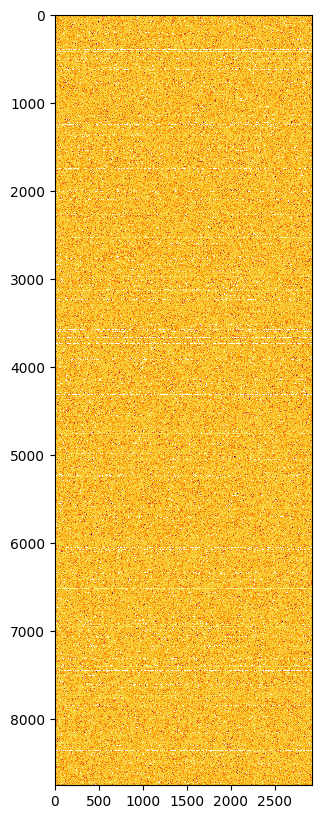

In [15]:
plt.figure(figsize=(30,10))
plt.imshow(wi.detach().numpy(), norm=colors.LogNorm(vmin=wi.min(), vmax=wi.max()), cmap='inferno', interpolation='nearest')
plt.show()

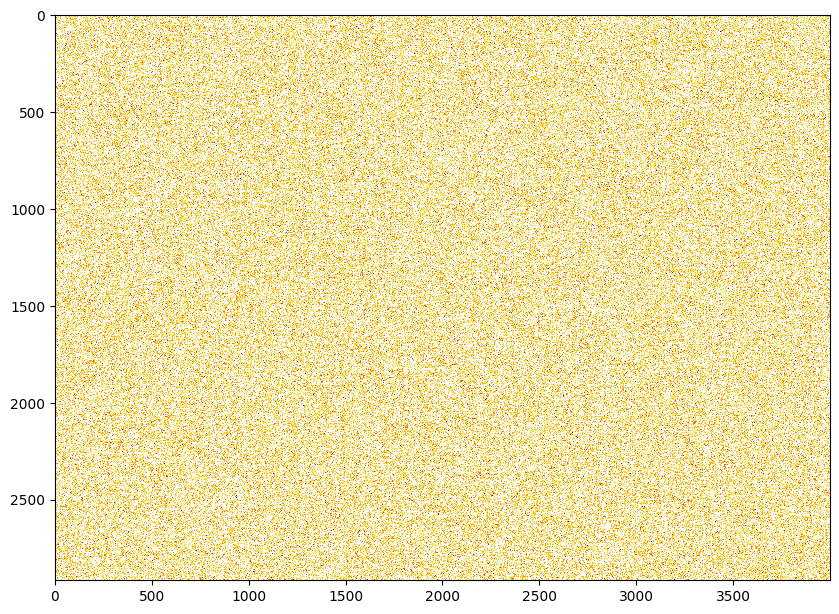

In [10]:
plt.figure(figsize=(10,30))
plt.imshow(wo.T.detach().numpy(),  norm=colors.LogNorm(vmin=wo.min(), vmax=wo.max()), cmap='inferno', interpolation='nearest')
plt.show()

In [11]:
# test
T = Cube()
to = embs[T.as_input-1].view(emb_size)
ti = embs[torch.concat([T.as_input,T.R.as_input,T.R.U.as_input][::-1])-1].view(emb_size*3).reshape(1,-1)
att = ti + posEmbs(torch.arange(1))
attn_output, attn_output_weights = multihead_attn(ti, ti, ti)
o = torch.tanh(attn_output @ wi + bi)
o2 = o @ wo + bo

(o2[0]-to)[:54]

tensor([ 0.0101,  0.0027, -0.0319, -0.0269, -0.0286, -0.0101,  0.0012, -0.0376,
         0.0080,  0.0038, -0.0217,  0.0140, -0.0025, -0.0526, -0.0110, -0.0285,
        -0.0275, -0.0018, -0.0154, -0.0045, -0.0306, -0.0155, -0.0209, -0.0388,
        -0.0475, -0.0184, -0.0366,  0.0201, -0.0033, -0.0269,  0.0091, -0.0004,
        -0.0241,  0.0077, -0.0233, -0.0624,  0.0304, -0.0111,  0.0104, -0.0397,
        -0.0206, -0.0071,  0.0207, -0.0052, -0.0108, -0.0276, -0.0256, -0.0519,
        -0.0129, -0.0300,  0.0420,  0.0036, -0.0243,  0.0337],
       grad_fn=<SliceBackward0>)

In [12]:
o2[0][:54]

tensor([-0.0194, -0.0186, -0.0085, -0.0150, -0.0197, -0.0140, -0.0181, -0.0086,
        -0.0133, -0.0141, -0.0194, -0.0085, -0.0063, -0.0183, -0.0100, -0.0048,
        -0.0078, -0.0129, -0.0063, -0.0184, -0.0162, -0.0078, -0.0144, -0.0058,
        -0.0167, -0.0125, -0.0152, -0.0119, -0.0192, -0.0114, -0.0187, -0.0078,
        -0.0070, -0.0047, -0.0084, -0.0163, -0.0053, -0.0091, -0.0105, -0.0209,
        -0.0165, -0.0124, -0.0068, -0.0208, -0.0066, -0.0136, -0.0134, -0.0190,
        -0.0142, -0.0173, -0.0085, -0.0169, -0.0181, -0.0066],
       grad_fn=<SliceBackward0>)

In [13]:
to[:54]

tensor([-0.0295, -0.0213,  0.0234,  0.0119,  0.0089, -0.0038, -0.0193,  0.0290,
        -0.0214, -0.0179,  0.0023, -0.0225, -0.0038,  0.0342,  0.0010,  0.0236,
         0.0197, -0.0111,  0.0091, -0.0139,  0.0143,  0.0077,  0.0065,  0.0331,
         0.0308,  0.0059,  0.0214, -0.0320, -0.0158,  0.0155, -0.0278, -0.0074,
         0.0171, -0.0124,  0.0149,  0.0461, -0.0357,  0.0020, -0.0209,  0.0188,
         0.0041, -0.0054, -0.0276, -0.0156,  0.0041,  0.0140,  0.0121,  0.0329,
        -0.0013,  0.0126, -0.0506, -0.0205,  0.0063, -0.0403])

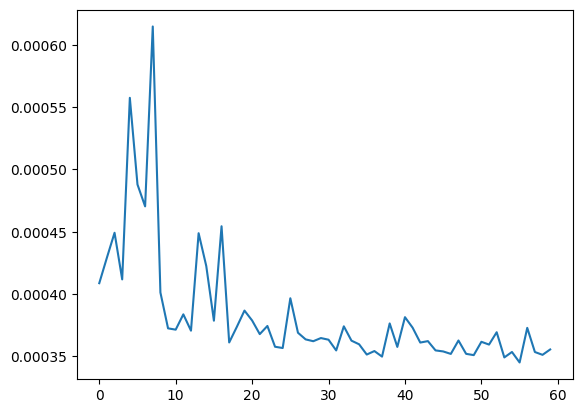

In [22]:
plt.plot(lossi[-60:])